<a href="https://colab.research.google.com/github/dynasty-29/Housing_Price_project/blob/main/Housing_Price_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

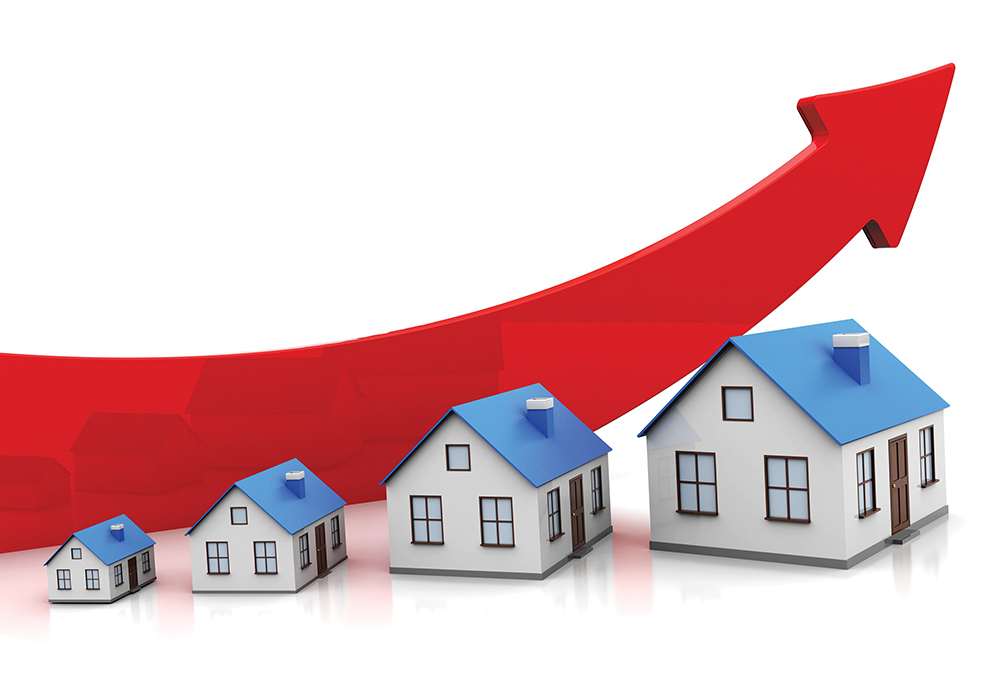
# **Housing Price Project**

HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

## **Problem Statement**

As a Data Scientist, working for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# **Research Questions**



*   To investigate the factors affecting housing prices at Hass consult.



## **Metrics of success**

1. Read and explore the given dataset.

2. Define the appropriateness of the available data to answer the given question.

3. Finding and dealing with outliers, anomalies, and missing data within the dataset.

4. Performing univariate, bivariate and multivariate analysis.

5. Performing regression analysis (Modeling).With an aim of the model having the smallest RMSE

6. Providing recommendation based the analysis.

7. Challenge the solution by providing insights on how you can make improvements in model improvement.

# **Data Understanding**



*   Will import important  libraries 
*   Will load our dataset



In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading our  dataset
data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


In [3]:

#Viewing the first five rows
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Viewing the last five rows
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#Checking the recordsof our data set
data.shape

(21613, 20)

In [6]:
#Our data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## **Data Preparation**

**1. Validity check**

In [7]:
#Checking an overview of column naming
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The columns are correctly spelt.


**2. Accuracy check**

In [8]:
#checking data types in our data
data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Our data consists of floats and integers

**3. Completeness check**

In [4]:
#We check for null values
data.isnull().sum().sum()

0

We have no missing values

**4. Consistency check**

In [4]:
#We check if we have any duplicates
data.duplicated().sum()

3

In [5]:
#dropping duplicates
data.drop_duplicates(inplace=True)

In [6]:
#Just checking no more duplicates
data.duplicated().sum()

0

We have no more duplicates

**5. Uniformity check**

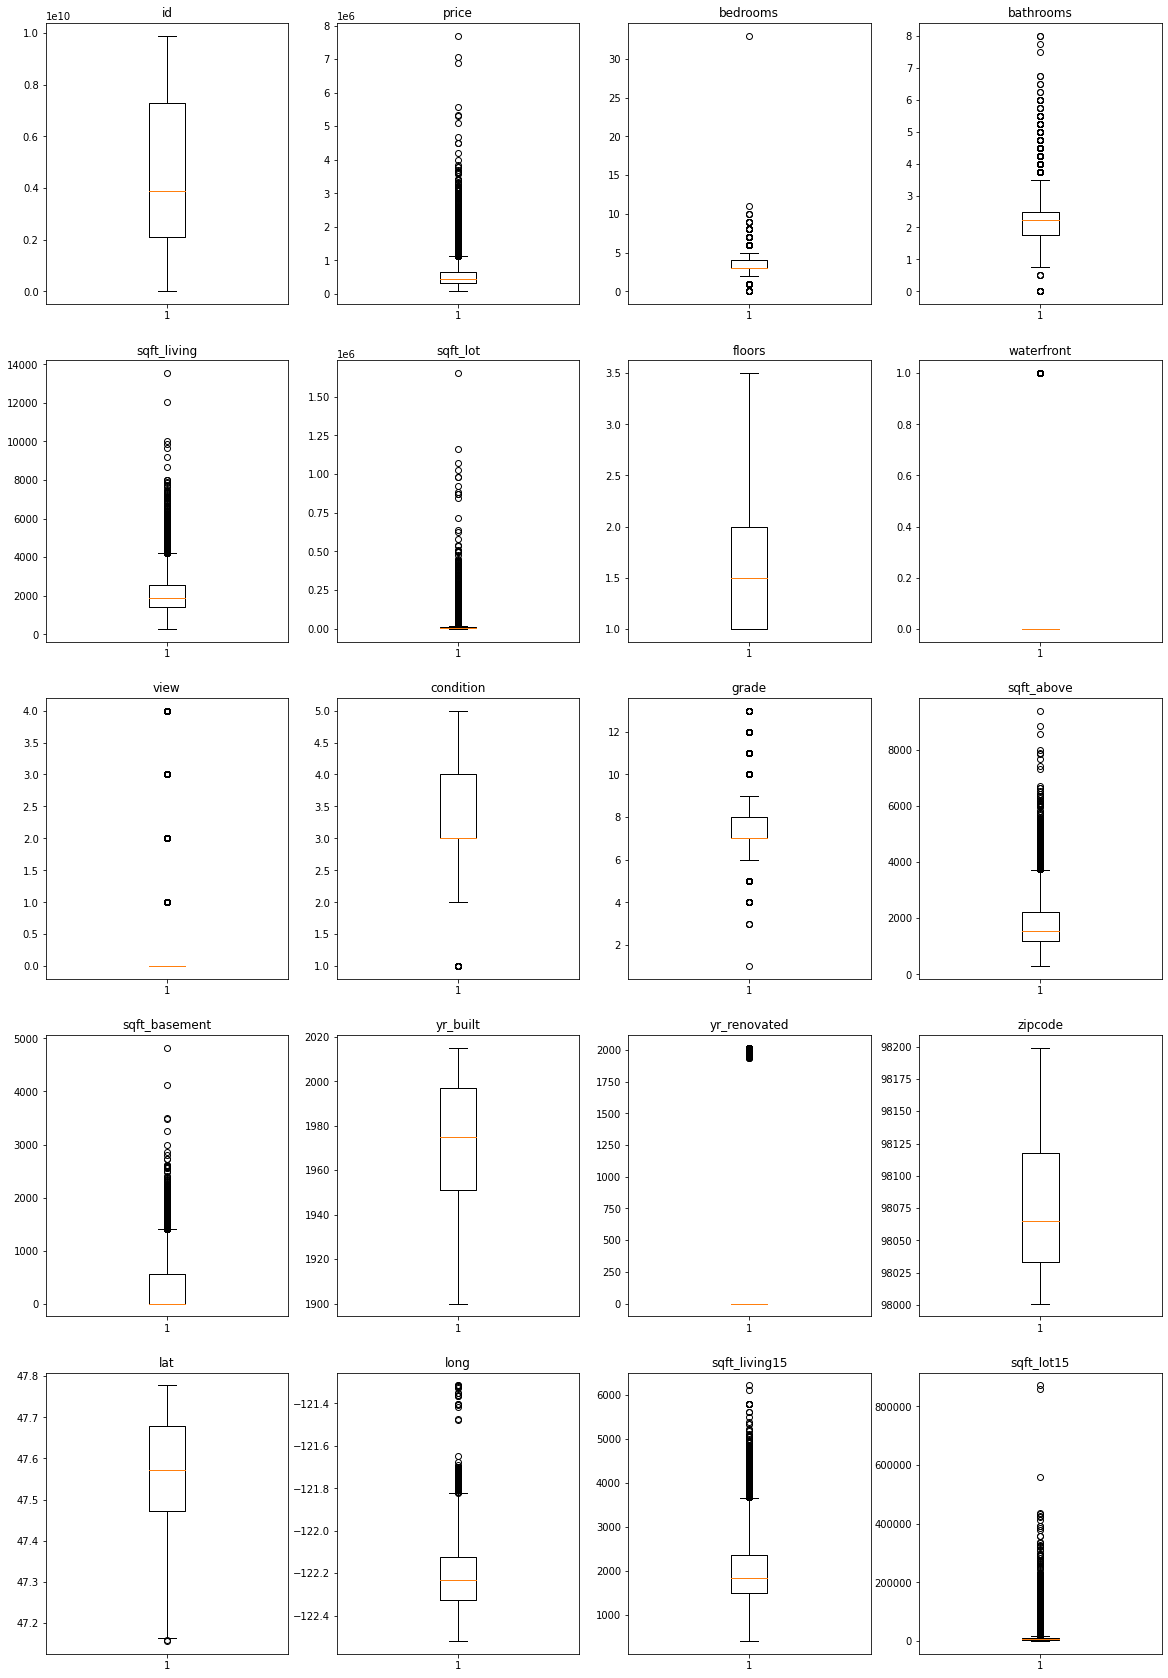

In [7]:
#Dealing with Outliers
# save the column names onto a dictionary
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

In [8]:
# dealing with outliers
# quantiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [15]:
df.shape

(14935, 20)

Checking relevance on the data insome of the columns to decide if will drop or not

In [16]:
df['waterfront'].value_counts()

0    14935
Name: waterfront, dtype: int64

In [17]:
df['view'].value_counts()

0    14935
Name: view, dtype: int64

In [18]:
df['grade'].value_counts()

7    7428
8    4426
6    1635
9    1446
Name: grade, dtype: int64

In [19]:
df['yr_renovated'].value_counts()

0    14935
Name: yr_renovated, dtype: int64

In [20]:
df['sqft_living15'].value_counts()

1540    169
1440    158
1560    152
1500    147
1510    145
       ... 
1802      1
2333      1
1321      1
3045      1
2927      1
Name: sqft_living15, Length: 551, dtype: int64

In [21]:
df['sqft_lot15'].value_counts()

5000     314
4000     269
6000     210
7200     156
7500     113
        ... 
8462       1
6967       1
8772       1
11859      1
2007       1
Name: sqft_lot15, Length: 5752, dtype: int64

In [22]:
df['sqft_basement'].value_counts()

0       9473
500      165
700      161
600      154
400      142
        ... 
784        1
506        1
243        1
1135       1
248        1
Name: sqft_basement, Length: 170, dtype: int64

In [23]:
df['condition'].value_counts()

3    9662
4    3964
5    1209
2     100
Name: condition, dtype: int64

There is no data in the following columns so we drop them:


*  waterfront

*   view
*  year renovated

The following column are duplicated so will delete the duplicates

*  sqft basement


*   sqft loft15
*   sqft living15




In [24]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
#Dropping unnecessary column
df = df.drop(['id',  'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis = 1)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,3,7,98178,47.5112,-122.257
2,180000.0,2,1.00,770,10000,1.0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,3,8,98074,47.6168,-122.045
6,257500.0,3,2.25,1715,6819,2.0,3,7,98003,47.3097,-122.327


## **EXPLORATORY DATA ANALYSIS**

### **1. Univarite Analysis**

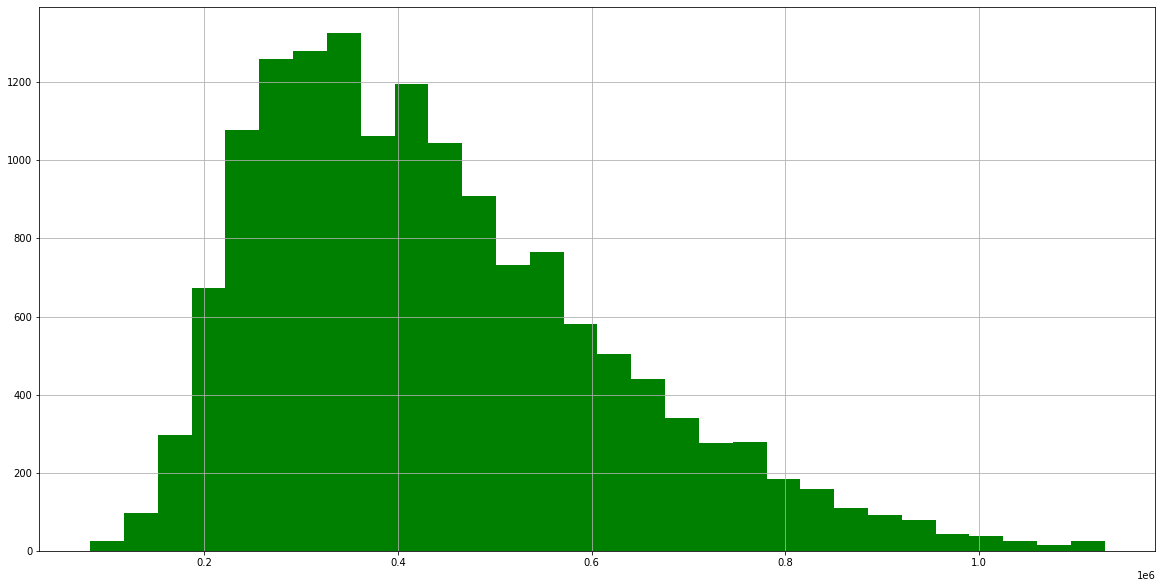

In [27]:
#Distribution plot
df['price'].hist(bins = 30, figsize = (20,10), color = 'g')

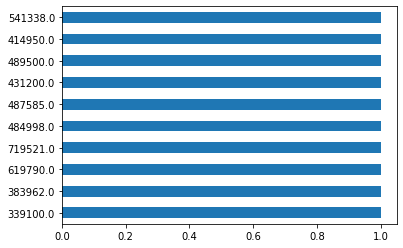

In [28]:
#Visualizing top price range
df.price.value_counts().sort_values().head(10).plot(kind = 'barh')

The highest price range at Hass counsult is  **541338**

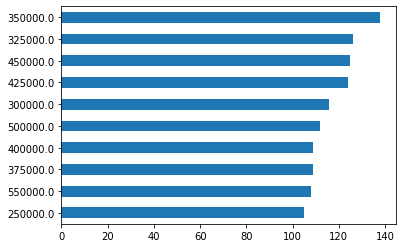

In [29]:
#Visualizing lowest price ranges
df.price.value_counts().sort_values().tail(10).plot(kind = 'barh')

The lowesst price at Hass Consult is **250000**

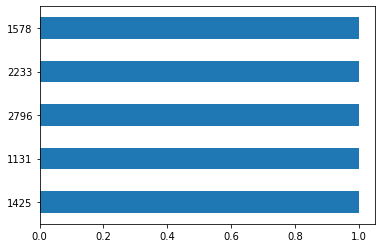

In [30]:
#Visualizing maximum square foot of the properties
df.sqft_living.value_counts().sort_values().head(5).plot(kind = 'barh')

The Maximum square foor per property is around **1578**

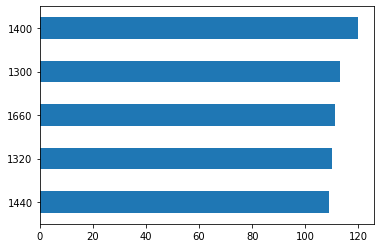

In [31]:
#Visualizing minimum square foot of the properties
df.sqft_living.value_counts().sort_values().tail(5).plot(kind = 'barh')

The Minimum square foor per property is around **1440**

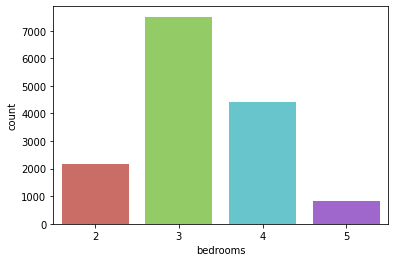

In [32]:
#Bedroom counts visual
sns.countplot(x='bedrooms',data=df, palette='hls')

Most houses has 3 bedrooms

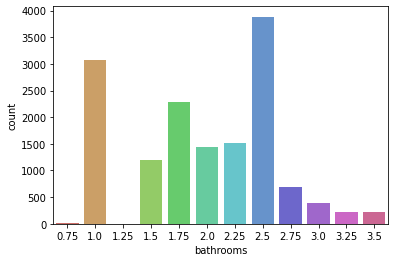

In [33]:
#Bathroom counts visual
sns.countplot(x='bathrooms',data=df, palette='hls')

Most houses have 3 bathrooms

### **2. Bivariate Analysis**

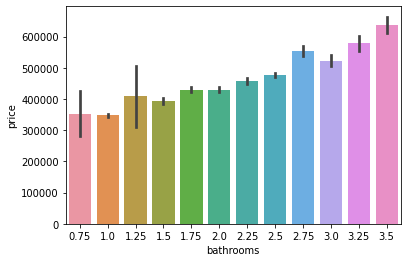

In [34]:
#Prices vs bathrooms
sns.barplot(x = 'bathrooms', y = 'price', data = df)
 

The more the bathrooms the higher the price

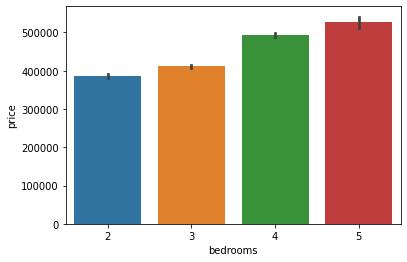

In [35]:
#Prices vs bed rooms
sns.barplot(x = 'bedrooms', y = 'price', data = df)
 

The more the bedrooms the higher the price

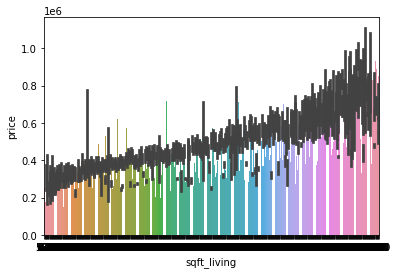

In [36]:
#prices vs Square foot of the property
sns.barplot(x = 'sqft_living', y = 'price', data = df)
 

Increase in square foot leads to increase in prices

### **3. Multivariate Analysis**

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,14935.0,438658.210847,180574.196255,82000.0000,300000.0000,405000.0000,547500.0000,1.130000e+06
bedrooms,14935.0,3.262337,0.772942,2.0000,3.0000,3.0000,4.0000,5.000000e+00
bathrooms,14935.0,1.972179,0.646058,0.7500,1.5000,2.0000,2.5000,3.500000e+00
sqft_living,14935.0,1814.293940,614.767257,560.0000,1350.0000,1740.0000,2210.0000,4.200000e+03
sqft_lot,14935.0,6988.896150,3355.737263,520.0000,4690.0000,7020.0000,8925.0000,1.914100e+04
floors,14935.0,1.471342,0.547908,1.0000,1.0000,1.0000,2.0000,3.500000e+00
condition,14935.0,3.420623,0.647318,2.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,14935.0,7.380516,0.805205,6.0000,7.0000,7.0000,8.0000,9.000000e+00
zipcode,14935.0,98079.765383,53.477499,98001.0000,98033.0000,98072.0000,98118.0000,9.819900e+04
lat,14935.0,47.558906,0.142091,47.1895,47.4576,47.5697,47.6835,4.777760e+01


The mean number of bedrooms on the Hass properties is three. with a minimum of 2 and a maximum of 5.

The mean number of bathrooms is 2, with a minimum of 1 and a maximum of 4.

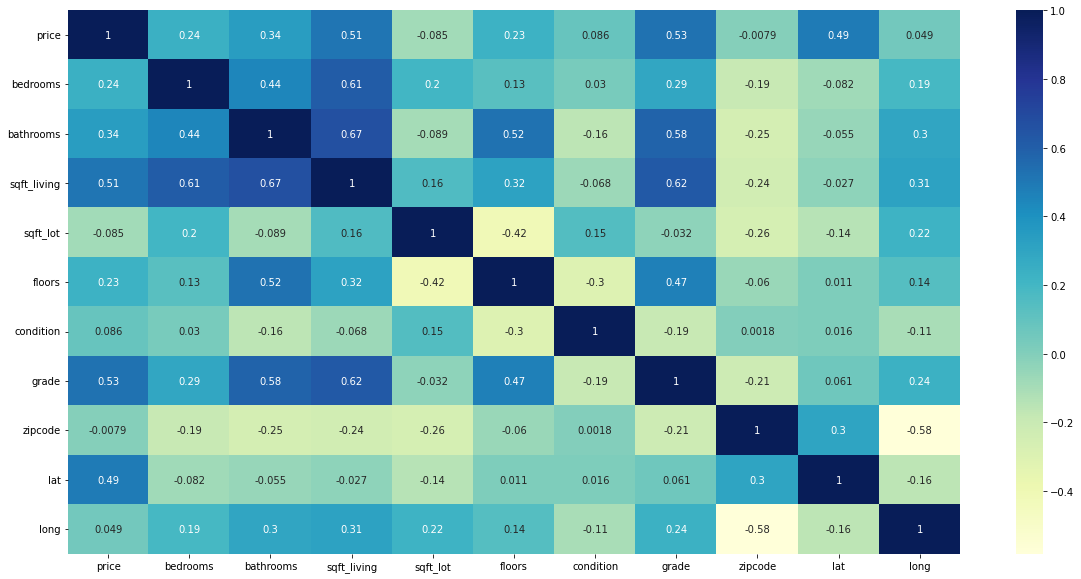

In [38]:
#Correlation check
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

The following correlation are observed:


*   Square foot living vs square foot above. (showing very strong correlation)
*   Bathrooms and number of floors the house has.




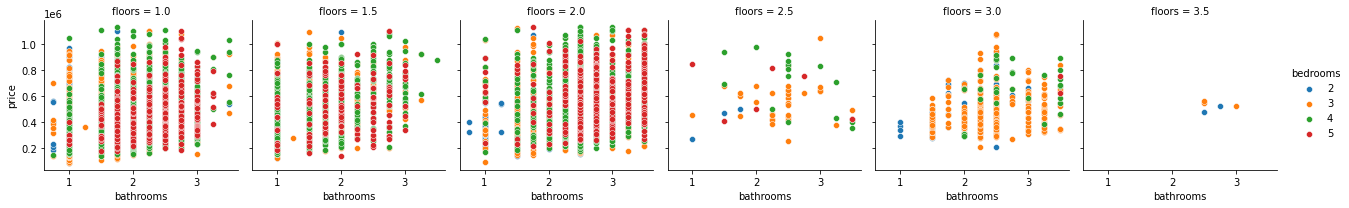

In [39]:
g = sns.FacetGrid(df, col="floors", hue="bedrooms")
g.map_dataframe(sns.scatterplot, x="bathrooms", y="price")
g.add_legend()

The more the floors the less the number of bathrooms and bedrooms

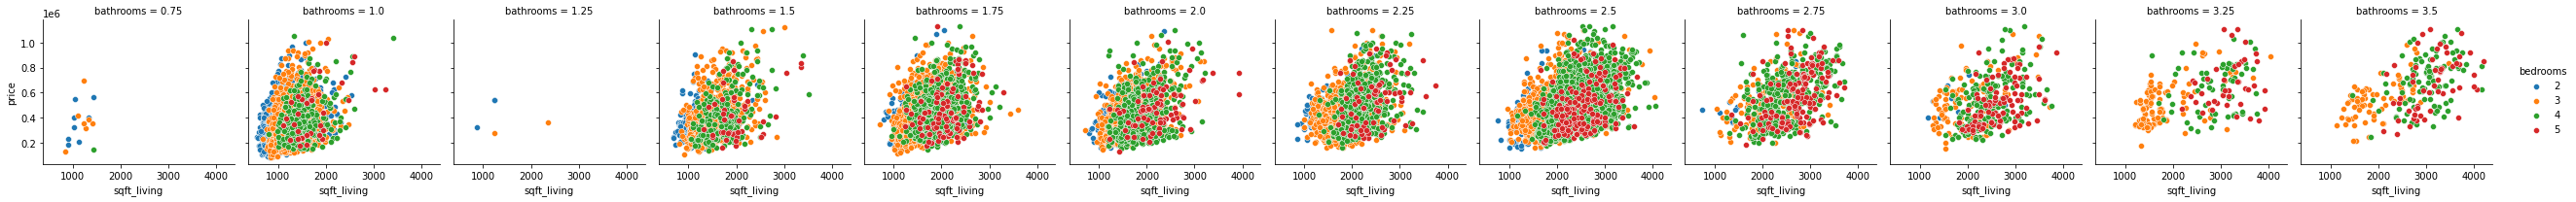

In [40]:
g = sns.FacetGrid(df, col="bathrooms", hue="bedrooms")
g.map_dataframe(sns.scatterplot, x="sqft_living", y="price")
g.add_legend()

The larger the square foot of the property the higher the prices. Also the more the  bedrooms the higher the price and the more the bathrooms

## **MODELING**

# **1. Regression**

**1.1. Multiple Linear Regression**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [42]:
#preprocessing
X = df.drop(['price'], axis=1)
y = df['price']


In [43]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

12862292235.72602


In [44]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
#spliting data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6073572519930959


In [46]:
#Exploring our results 
y_pred = regr.predict(X_test)
y_pred


array([469968.28583815, 441575.43700058, 561230.63826666, ...,
       410122.52670609, 581521.72457743, 472880.67989643])

In [47]:
#Evaluation Metrics For Regression
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 84826.99078169833
MSE: 12754215218.523935
RMSE: 112934.56166525788


Our Price Mean is 438658, the model gives us an RMSE of 112934 which is quite smaller making the model a good model, but will try out with other models before making a final decision

### **1.2. Quantile Regression**

In [48]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [49]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
#quantile regression
import statsmodels.formula.api as smf
quantiles = [0.25,0.5,0.75]
# Loop through the quartiles
for i in quantiles:
  mod = smf.quantreg('y ~ X', df)
  res = mod.fit(i)
  
  #Summary of the model
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4279
Model:                       QuantReg   Bandwidth:                   1.749e+04
Method:                 Least Squares   Sparsity:                    3.029e+05
Date:                Sun, 12 Jun 2022   No. Observations:                14935
Time:                        11:34:36   Df Residuals:                    14924
                                        Df Model:                           10
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.018e+05   1073.637    467.424      0.000       5e+05    5.04e+05
X[0]       -6545.7977   1439.020     -4.549      0.000   -9366.453   -3725.142
X[1]       -1.508e+04   1743.285     -8.652      0.000   -1.85e+04   -1.17e+04
X[2]        8.648e+04   1843.692     46.907      0.000    8.29e+04    9.01e+04
X[3]       -1.793e+04   1380.830    -12.982      0.000   -2.06e+04   -1.52e+04
X[4]       -1921.7901   1483.614     -1.295      0.195   -4829.856     986.275
X[5]         3.07e+04   1172.936     26.177      0.000    2.84e+04     3.3e+04
X[6]        5.513e+04   1556.311     35.424      0.000    5.21e+04    5.82e+04
X[7]       -1.271e+04   1344.667     -9.454      0.000   -1.53e+04   -1.01e+04
X[8]        1.044e+05   1015.892    102.777      0.000    1.02e+05    1.06e+05
X[9]        -1.23e+04   1376.339     -8.935      0.000    -1.5e+04   -9600.445
==============================================================================
"""

Our quantile Pseudo R squred is 0.4279

### **1.3. Ridge Regression**

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [52]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [53]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
#Reminding our self our baseline model
print(first_model)

12862292235.72602


In [55]:
#Determining l2 and our cross validation
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(0,4,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [56]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

16904900149.328999

In [57]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

12865073403.498577


In [58]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 127.41338662777707,
 'bedrooms': -19312.70914209417,
 'condition': 70195.91008422637,
 'floors': 45487.74218002749,
 'grade': -207.9086749876915,
 'lat': -72277.15900560246,
 'price': -6675.78439641573,
 'sqft_living': -6.351217910018022,
 'sqft_lot': -6510.571534602716,
 'zipcode': 595203.8770783052}

The coefficient are different meaning regulzation was useful for this model

In [59]:
print("ridge RMSE:",np.sqrt(second_model))

ridge RMSE: 113424.30693417782


Our RMSE for ridge model is 113424, when we compare this to our mean price it makes the second best regression model.

### **1.4. Lasso Regression**

In [60]:
from sklearn.linear_model import Lasso
from sklearn import linear_model

In [61]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [62]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
# Fitting Lasso Regression

lasso = linear_model.Lasso() 

# Fitting the linear regression
lasso.fit(X, y) 


Lasso()

In [64]:
# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6055099329838185
lasso MSE: 12862292258.347366
lasso coef: [ -5157.67450264 -12473.6439322   78322.3548066  -21309.62038515
  -3565.06271043  29443.32569266  56518.85939074 -11114.93921194
  84569.25056526  -8937.35885519]


In [65]:
#Spilting data set and testing on different alphas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5,10), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso RMSE:", mean_squared_error(y_test, gridlasso.predict(X_test), squared=False))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 22.0}
lasso score: 0.5929370353480296
linear score: 0.5929585358156815
lasso MSE: 13601152439.725565
linear MSE: 13600434046.839321
lasso RMSE: 116623.97883679652
lasso best estimator coef: [ -4358.19530392 -12886.65378889  77252.07753902 -21026.96572219
  -2828.33327848  29946.0116169   56424.25282619  -9087.2549209
  84614.67831587  -7735.04174998]
linear coef: [ -4407.04813389 -12954.32064111  77354.62089618 -21085.05807743
  -2872.8763797   29960.51648821  56453.74205194  -9156.29061091
  84634.64820755  -7783.18000909]


Using Lasso the RMSE is 116623 which makes the model a good model when we compare the mean of our target which is price(438658)

Text(0, 0.5, 'coefs')

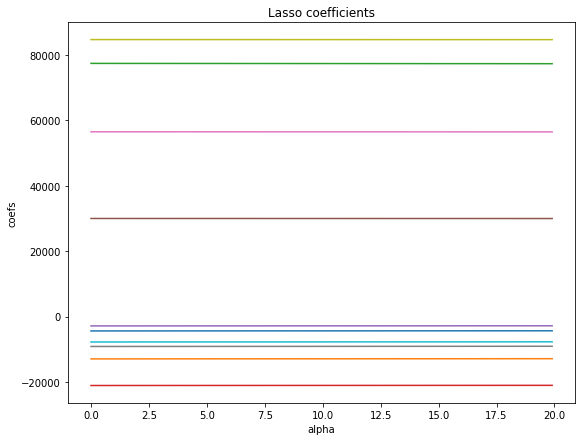

In [66]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (20,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

### **1.5. Elastic Net Regression**

In [67]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [68]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [69]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
#spliting data set
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [71]:
# setting up different alphas to get Best alpha
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = ElasticNet(alpha=a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.61, MSE:12862292308.96, RMSE:113412.05
Alpha:0.0010, R2:0.61, MSE:12862299541.17, RMSE:113412.08
Alpha:0.0100, R2:0.61, MSE:12863005664.13, RMSE:113415.19
Alpha:0.1000, R2:0.60, MSE:12920084305.90, RMSE:113666.55
Alpha:0.3000, R2:0.59, MSE:13227192229.54, RMSE:115009.53
Alpha:0.5000, R2:0.58, MSE:13638615943.37, RMSE:116784.49
Alpha:0.7000, R2:0.57, MSE:14086970887.37, RMSE:118688.55
Alpha:1.0000, R2:0.55, MSE:14772691335.86, RMSE:121542.96


In [72]:
#Defining model and checking the results
elastic=ElasticNet(alpha=0.0001).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.605, MSE:13163391513.99, RMSE:114731.82


In [73]:
#Cross-validation with ElasticNetCV
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)

print(model.intercept_)


0.001
438300.32048187277


In [74]:
#We can predict xtest data and check the accuracy metrics.
ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.605, MSE:13163662458.69, RMSE:114733.01


Our RMSE for Elastic net is 114733 which makes it the third best regression model after ridge  and Multilinear regression

## **2. Decision Trees**

In [75]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [76]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [77]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
# splitting the dataaset into Training and Testing Data 


# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [79]:
#Training the decision tree


# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
#Predicting the outputs
y_pred = classifer.predict(X_test)
y_pred

array([447000., 219000., 549000., ..., 405000., 487275., 305000.])

In [81]:
#Evaluating the model with accuracy metrics.
y_pred = classifer.predict(X_test)
score = classifer.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.008, MSE:9692133658.32, RMSE:98448.63


Our decision model give us an RMSE of 98448 which makes it a better model compared to all the regression models above

## **3. KNN**

In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [83]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [84]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [85]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [86]:
knn = KNeighborsRegressor()

knn_rmse = []

# Without feature scaling
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))
print(knn_rmse)

[89489.69167989281]


Using KNN our RMSE for this model is 89489 making it a pretty good model, better than decision trees and regression models

## **4. SVM**

In [87]:
from sklearn import preprocessing, svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics

In [88]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [89]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
#Create a svm Classifier
clf = SVC()

#Train the model using the training sets
clf.fit(X_train, y_train)


SVC()

In [92]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [93]:
#Evaluating the model with accuracy metrics.
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.017, MSE:14572281808.14, RMSE:120715.71


Using the SVM model our RMSE is 120715 which is high compared to other models making this model not a good model

## **5. Naive Bayes**

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [96]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [97]:
# splitting X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
# training the model on training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 

GaussianNB()

In [99]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [100]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 0.08926578888640928


In [101]:
#Evaluating the model with accuracy metrics.
y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.001, MSE:26863862882.34, RMSE:163901.99


Using Naive bayes give an RMSE of 163901 ,which not good compared to KNN, decision trees and Regression models

## **6. Random Forest**

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'zipcode', 'lat', 'long']]
y = df['price']

In [19]:
## Standadizing our features
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# splitting X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#fitting our training set
regressor = RandomForestRegressor(n_estimators = 100, random_state =0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
y_pred = regressor.predict(X_test)

In [25]:
#Evaluating the model with accuracy metrics.
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.860, MSE:4539253722.17, RMSE:67373.98


Our RMSE using Random forest is 67373 making it the best model overall

# **Conclusion**

There were notable observation on various determinats of pricing at Hass counsult company:

* The highest price range at Hass counsult is 541338
* The lowest price at Hass Consult is 250000
* The Maximum square floor per property is around 1578
* The Minimum square floor per property is around 1440
* Most houses has 3 bedrooms
* Most houses have 3 bathrooms
* The more the bathrooms the higher the price
* The more the bedrooms the higher the price
* Increase in square foot leads to increase in prices
* The mean number of bedrooms on the Hass properties is three. with a minimum of 2 and a maximum of 5.
* The mean number of bathrooms is 2, with a minimum of 1 and a maximum of 4.

From the models and computations above, it was realised that the mean squared errors for th models were:
1. Regression models

a. RMSE for multiple linear regression is 112934

b. Pseudo R-squared: for quantile regression 0.4279 for quantile regression 

c. RMSE for ridge regression: 113424

d. Lasso RMSE: 116623

e. Elastic net RMSE: 114733

2. Decison trees RMSE: 98448

3. KNN RMSE: 89489

4. SVM RMSE: 120715

5. Naives Bayes RMSE: 163901

6. Randomforest RMSE: 67373


From this observation we can say that the best regression model was Multilinear regression .

The overall Best model was Random forest.
 


**Recommendations **

* Conclusively, the appropriate Prediction model for the housing prices is the Random Forest. This is because this model would allow the company to accurately predict the sale of prices upon being provided with the predictor variables, while avoiding overfitting and in turn increasing accuracy.

* On simplicity and training time Multilinear regression is the best choice for predicting housing prices, a model that was used as the base comparison model.

  **Note:** The models were okay but the regression model that i would provide Hass consulting Company with will be the multiple regression model.

